In [19]:
import pandas as pd
# Load the dataset
df = pd.read_csv('C:/Users/dnyan/FODS Assignments/Datasets/heart.csv')
data = df.iloc[:, 4]
print(data.head())

0    289
1    180
2    283
3    214
4    195
Name: Cholesterol, dtype: int64


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Age'),
  Text(1, 0, 'RestingBP'),
  Text(2, 0, 'Cholesterol'),
  Text(3, 0, 'FastingBS'),
  Text(4, 0, 'MaxHR'),
  Text(5, 0, 'Oldpeak'),
  Text(6, 0, 'HeartDisease')])

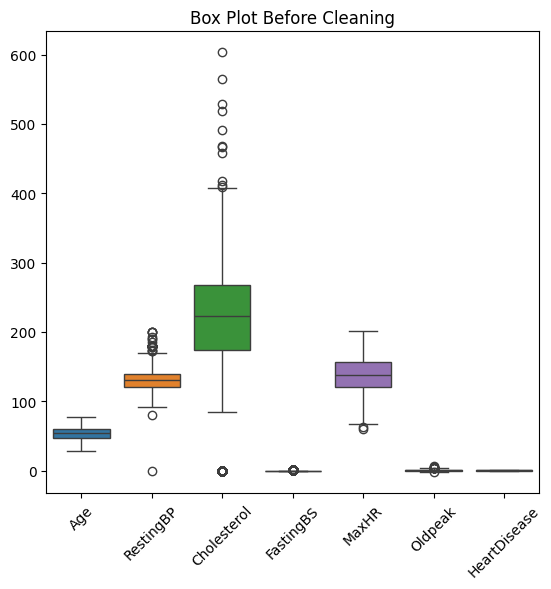

In [20]:
# Before Cleaning: Visualize Outliers
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[numeric_columns])
plt.title('Box Plot Before Cleaning')
plt.xticks(rotation=45)

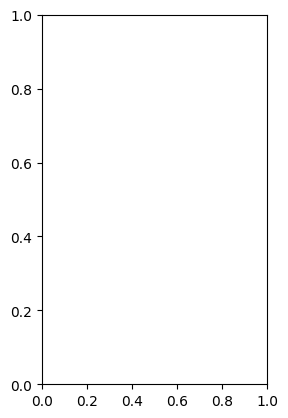

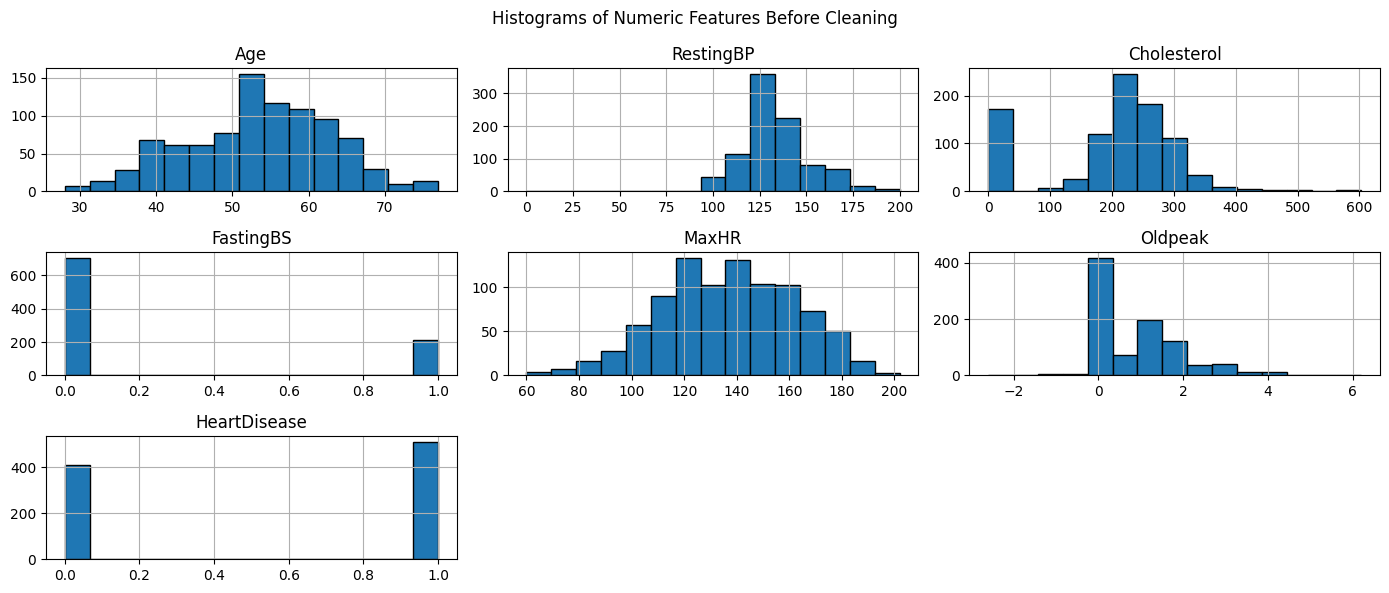

In [21]:
# Plot Histograms
plt.subplot(1, 2, 2)
df[numeric_columns].hist(bins=15, edgecolor='black', figsize=(14, 6))
plt.suptitle('Histograms of Numeric Features Before Cleaning')

plt.tight_layout()
plt.show()

In [22]:
#Step 1: Data Cleaning
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [23]:
#NO missing values in dataset

In [24]:
dataset_null = df.isnull()
print(dataset_null)  

       Age    Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0    False  False          False      False        False      False   
1    False  False          False      False        False      False   
2    False  False          False      False        False      False   
3    False  False          False      False        False      False   
4    False  False          False      False        False      False   
..     ...    ...            ...        ...          ...        ...   
913  False  False          False      False        False      False   
914  False  False          False      False        False      False   
915  False  False          False      False        False      False   
916  False  False          False      False        False      False   
917  False  False          False      False        False      False   

     RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0         False  False           False    False     False         False  

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [26]:
# 1. Check for inconsistent values in categorical columns and display unique values
for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    print(f"Unique values in {col} column: {df[col].unique()}")

Unique values in Sex column: ['M' 'F']
Unique values in ChestPainType column: ['ATA' 'NAP' 'ASY' 'TA']
Unique values in RestingECG column: ['Normal' 'ST' 'LVH']
Unique values in ExerciseAngina column: ['N' 'Y']
Unique values in ST_Slope column: ['Up' 'Flat' 'Down']


In [27]:
# 2. Encode categorical columns
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['ChestPainType'] = df['ChestPainType'].map({'TA': 0, 'ATA': 1, 'NAP': 2, 'ASY': 3})
df['RestingECG'] = df['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N': 0, 'Y': 1})
df['ST_Slope'] = df['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})

In [28]:
import numpy as np

# 3. Handle outliers in numeric columns using Interquartile Range (IQR) method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

for col in ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']:
    remove_outliers(df, col)

In [29]:
# 4. Verify the data types after cleaning and encoding
print(df.info())

# Display the cleaned data
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    float64
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 86.2 KB
None
    Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0  40.0    1              1      140.0        289.0          0           0   
1  49.0    0              2      160.0        180.0  

In [30]:
# 1. Data Validation

# Set valid ranges for numerical columns (age, cholesterol, etc.)
valid_age_range = (0, 120)
valid_resting_bp_range = (0, 200)
valid_cholesterol_range = (0, 600)
valid_max_hr_range = (0, 220)

In [31]:
# Apply range checks and replace out-of-range values with NaN
df.loc[~df['Age'].between(*valid_age_range), 'Age'] = np.nan
df.loc[~df['RestingBP'].between(*valid_resting_bp_range), 'RestingBP'] = np.nan
df.loc[~df['Cholesterol'].between(*valid_cholesterol_range), 'Cholesterol'] = np.nan
df.loc[~df['MaxHR'].between(*valid_max_hr_range), 'MaxHR'] = np.nan

In [32]:
from scipy import stats
# 2. Outlier Detection and Correction

# Using Z-score method for outlier detection in numerical columns
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
z_scores = np.abs(stats.zscore(df[numeric_columns]))
outliers = (z_scores > 3)  # Threshold set to 3 standard deviations
df[numeric_columns] = df[numeric_columns].mask(outliers, np.nan)

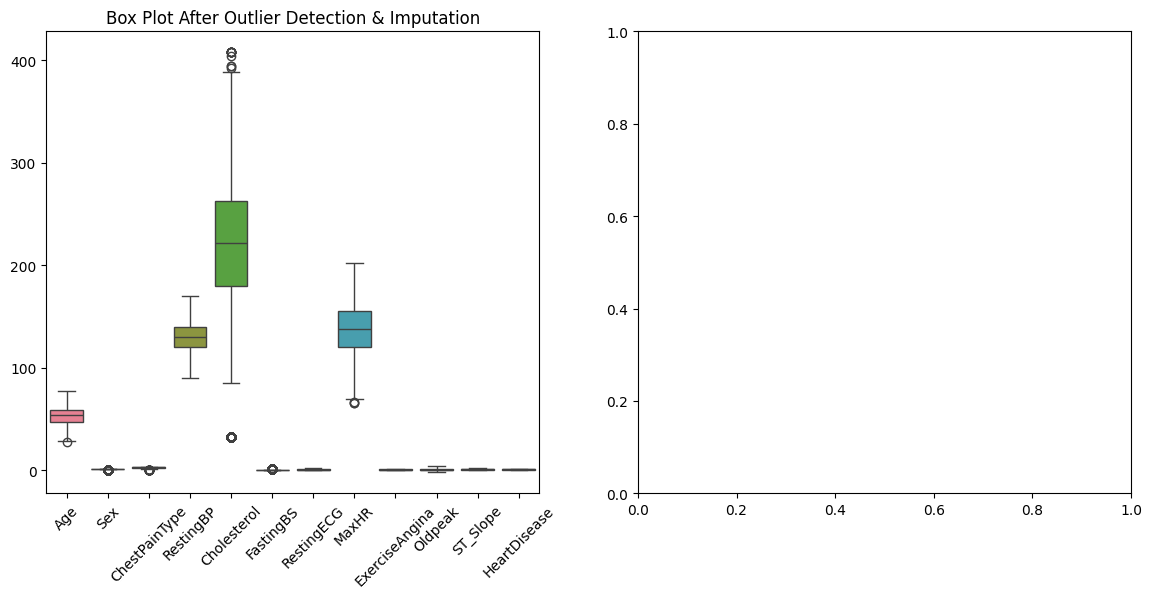

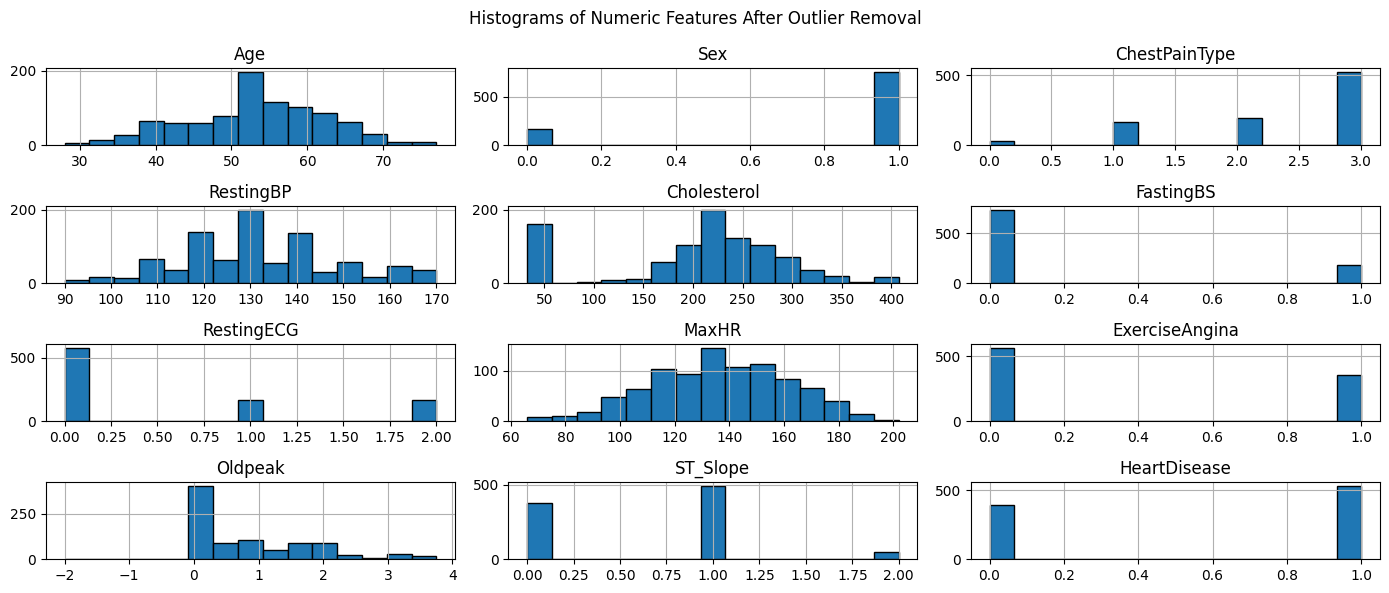

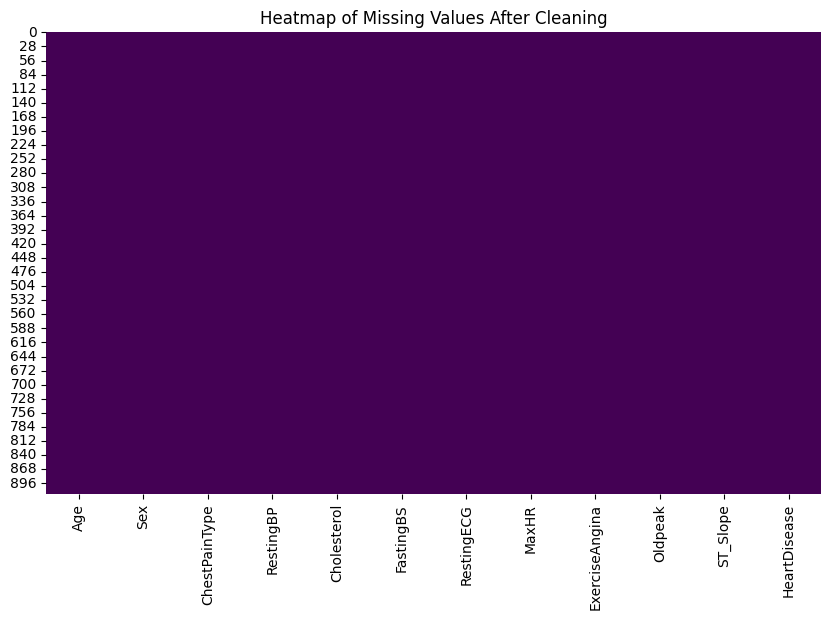

In [35]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame (assuming you've already done this)
# df = pd.read_csv('your_dataset.csv') # Uncomment and modify this line to load your dataset

# Define numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# 1. Handle Missing Values - Impute using Median
imputer = SimpleImputer(strategy='median')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# 2. Detect outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.05)
outliers = iso_forest.fit_predict(df[numeric_columns])

# 3. Mark outliers as NaN for imputation
df.loc[outliers == -1, numeric_columns] = np.nan

# 4. Impute outliers again using median for numeric columns
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Visualization
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[numeric_columns])
plt.title('Box Plot After Outlier Detection & Imputation')
plt.xticks(rotation=45)

# Plot Histograms After Cleaning
plt.subplot(1, 2, 2)
df[numeric_columns].hist(bins=15, edgecolor='black', figsize=(14, 6))
plt.suptitle('Histograms of Numeric Features After Outlier Removal')

plt.tight_layout()
plt.show()

# Heatmap for Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values After Cleaning')
plt.show()


In [36]:
#Standardization for Consistency

# Convert Sex and ExerciseAngina to categorical 
df['Sex'] = df['Sex'].replace({0: 'Female', 1: 'Male'})
df['ExerciseAngina'] = df['ExerciseAngina'].replace({0: 'No', 1: 'Yes'})

In [37]:
# Handling Duplicates

# Check and remove exact duplicates
df.drop_duplicates(inplace=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Age'),
  Text(1, 0, 'ChestPainType'),
  Text(2, 0, 'RestingBP'),
  Text(3, 0, 'Cholesterol'),
  Text(4, 0, 'FastingBS'),
  Text(5, 0, 'RestingECG'),
  Text(6, 0, 'MaxHR'),
  Text(7, 0, 'Oldpeak'),
  Text(8, 0, 'ST_Slope'),
  Text(9, 0, 'HeartDisease')])

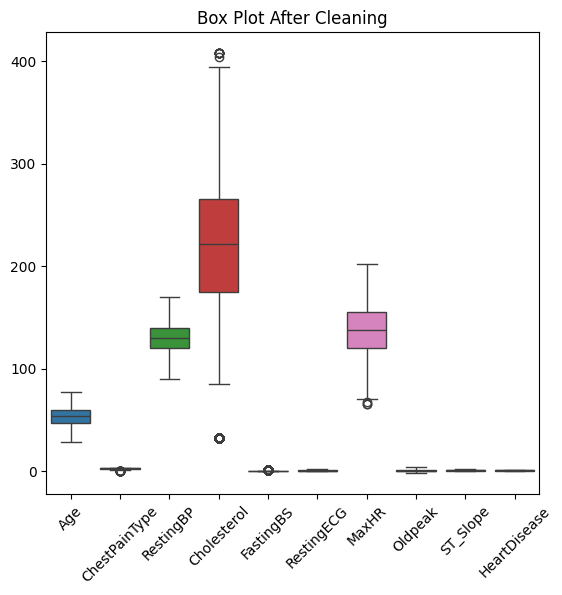

In [38]:
# After Cleaning: Visualize Outliers Again
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[numeric_columns])
plt.title('Box Plot After Cleaning')
plt.xticks(rotation=45)

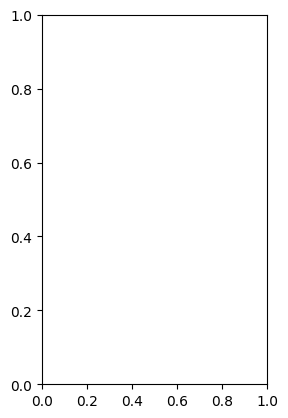

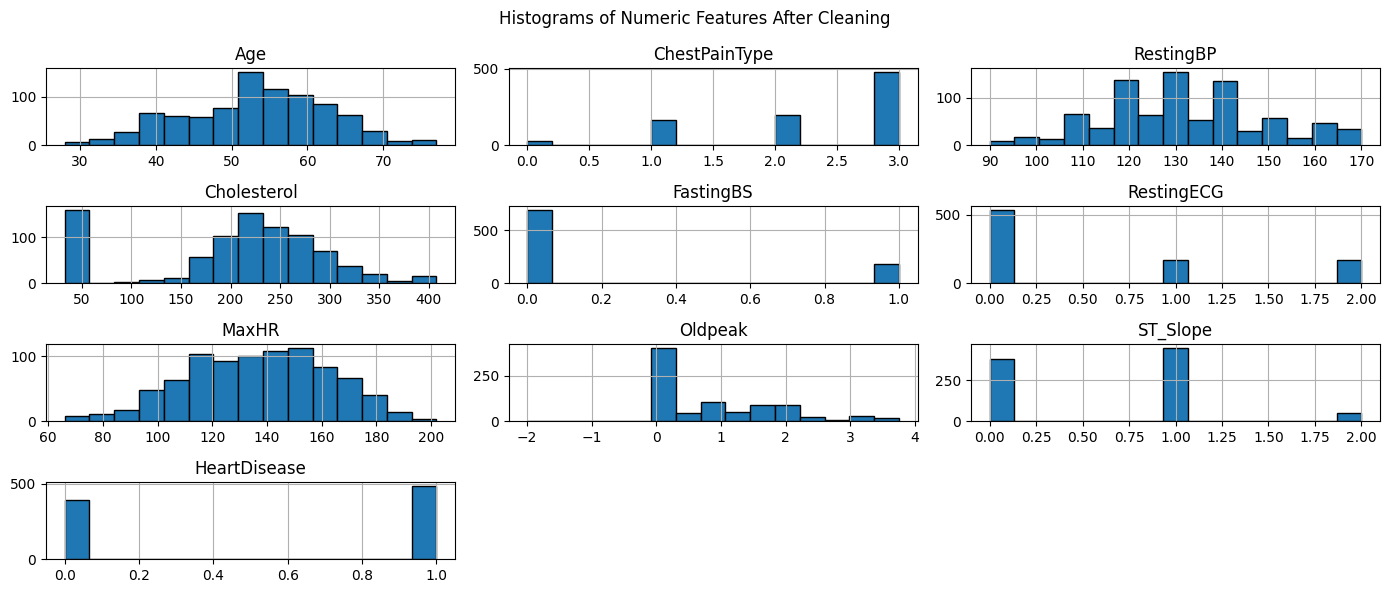

In [39]:
# Plot Histograms Again
plt.subplot(1, 2, 2)
df[numeric_columns].hist(bins=15, edgecolor='black', figsize=(14, 6))
plt.suptitle('Histograms of Numeric Features After Cleaning')

plt.tight_layout()
plt.show()